<a href="https://colab.research.google.com/github/ahyeong514/2024-1-my-BDA/blob/main/04w_0326_tue_ch06_dataframe_hanling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 파이썬 설치 확인

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.5.3
1.25.2
0.13.1


## 코랩에서 한글 확인

In [4]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.9 MB/s eta 0:00:00


In [5]:
# 그림 선명하게
%config inlineBaxkend.figure_format='retina'

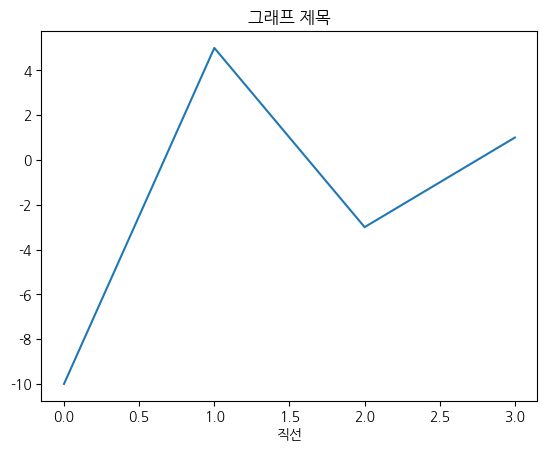

In [6]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10,5,-3,1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

## 수업에서 사용할 데이터를 다음 깃에서 복사
https://github.com/ai7dnn/data.git

In [7]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 7.00 MiB/s, done.


In [8]:
import pandas as pd

exam=pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [10]:
exam.sample(5)

,id,nclass,math,english,science
10,11,3,65,65,65
1,2,1,60,97,60
9,10,3,50,98,45
3,4,1,30,98,58
12,13,4,46,98,65


In [11]:
exam.query('nclass==1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [24]:
exam['nclass'] == 1

0      True
1      True
2      True
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: nclass, dtype: bool

In [23]:
exam[exam['nclass'] == 1]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [12]:
#2반인 경우만 추출
exam.query('nclass==2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [13]:
#수학점수가 50점을 초과한 경우
exam.query('math>50')

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [14]:
#영어 점수가 80점 이하인 경우
exam.query('english<=80')

,id,nclass,math,english,science
4,5,2,25,80,65
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87


In [15]:
# 1반이면서 수학 점수가 50점 이상인 경우
exam.query('nclass==1 & math>=50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [16]:
# 2반 이면서 영어 점수가 50점 이상인 경우
exam.query('nclass==2 & english>=50')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [18]:
# 2반 이면서 영어 점수가 80점 이상인 경우
exam.query('nclass==2 & english>=80')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45


In [19]:
#수학 점수가 90점 이상이거나 영어 점수가 90점 이상인 경우
exam.query('math>=90 | english>=90')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
12,13,4,46,98,65
15,16,4,58,98,65


In [20]:
#1,3,5반에 해당하면 추출
exam.query('nclass==1 | nclass==3 | nclass==5')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [21]:
#1,3,5반에 해당하면 추출
exam.query('nclass in[1,3,5]')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [25]:
exam.query('nclass in[1,3,5]')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [28]:
exam[exam['nclass']. isin([1,3,5])] # 시험예상

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [29]:
exam["nclass"] #시리즈

0     1
1     1
2     1
3     1
4     2
5     2
6     2
7     2
8     3
9     3
10    3
11    3
12    4
13    4
14    4
15    4
16    5
17    5
18    5
19    5
Name: nclass, dtype: int64

In [30]:
exam[["nclass"]] # 데이터 프레임

,nclass
0,1
1,1
2,1
3,1
4,2
5,2
6,2
7,2
8,3
9,3


In [31]:
exam[["nclass","math"]]

,nclass,math
0,1,50
1,1,60
2,1,45
3,1,30
4,2,25
5,2,50
6,2,80
7,2,90
8,3,20
9,3,50


## 추출한 행으로 데이터 만들기

In [32]:
# nclass가 1인 행 추출해 nclass1에 할당
nclass1 = exam.query('nclass == 1')

# nclass가 2인 행 추출해 nclass2에 할당
nclass2 = exam.query('nclass == 2')


In [33]:
nclass1

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [34]:
nclass2

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [35]:
nclass1["math"].mean()

46.25

In [38]:
nclass1["math"].sum() #1반의 총합

185

In [41]:
nclass1.math.sum()

185

In [37]:
# nclass가 1인 행 추출해 nclass1에 할당
nclass1 = exam[exam.nclass == 1]

# nclass가 2인 행 추출해 nclass2에 할당
nclass2 = exam[exam.nclass == 2]

In [42]:
#2반의 과학 점수 평균 구하기
nclass2["science"].mean()

58.25

## 문자 변수를 이용해 조건에 맞는 행 추출하기

In [44]:
df=pd.DataFrame({'sex'     : ['F', 'M', 'F', 'M'],
                   'country' : ['Korea', 'China', 'Japan', 'USA']})
df

,sex,country
0,F,Korea
1,M,China
2,F,Japan
3,M,USA


In [45]:
# 전체 조건에 작은따옴표, 추출할 문자에 큰따옴표 사용
df.query('sex == "F" & country == "Korea"')

,sex,country
0,F,Korea


In [46]:
# 전체 조건에 큰따옴표, 추출할 문자에 작은따옴표 사용
df.query("sex == 'M' & country == 'China'")

,sex,country
1,M,China


In [47]:
# 전체 조건과 추출할 문자에 모두 작은따옴표 사용
df.query("sex == 'F' & country == 'Korea'")

,sex,country
0,F,Korea


## (알아두면 좋아요) 외부변수를 이용해 추출하기

In [49]:
var=2
exam.query('nclass==@var')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [51]:
exam[exam.nclass==var]

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


|논리 연산자|기능
|<	|작다
|<=	|작거나 같다
|>	|크다
|>=	|크거나 같다
|==	|같다
|!=	|같지 않다
||	|또는
|&	|그리고
|in	|매칭 확인

산술 연산자	기능
+	더하기
-	빼기
*	곱하기
**	제곱
/	나누기
//	나눗셈의 몫
%	나눗셈의 나머지


## 메소드df.isin()

In [52]:
df = pd.DataFrame({'num_legs': [2, 4], 'num_wings': [2, 0]},
                  index=['falcon', 'dog'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0


In [53]:
df.isin([0]) # list나 dict 형태

,num_legs,num_wings
falcon,False,False
dog,False,True


In [54]:
df.isin([0, 2])

,num_legs,num_wings
falcon,True,True
dog,False,True


## 06-3 필요한 변수만 추출하기

In [60]:
exam['math'] #math추출

0     50
1     60
2     45
3     30
4     25
5     50
6     80
7     90
8     20
9     50
10    65
11    45
12    46
13    48
14    75
15    58
16    65
17    80
18    89
19    78
Name: math, dtype: int64

In [61]:
exam[['english']] #english추출

,english
0,98
1,97
2,86
3,98
4,80
5,89
6,90
7,78
8,98
9,98


In [62]:
exam.english

0     98
1     97
2     86
3     98
4     80
5     89
6     90
7     78
8     98
9     98
10    65
11    85
12    98
13    87
14    56
15    98
16    68
17    78
18    68
19    83
Name: english, dtype: int64

In [63]:
exam.columns

Index(['id', 'nclass', 'math', 'english', 'science'], dtype='object')

In [64]:
exam.sample(3)

,id,nclass,math,english,science
9,10,3,50,98,45
6,7,2,80,90,45
16,17,5,65,68,98


In [65]:
exam.columns[3]

'english'

In [66]:
exam[exam.columns[3]] #]추가시 데이터 프레임으로 나옴

0     98
1     97
2     86
3     98
4     80
5     89
6     90
7     78
8     98
9     98
10    65
11    85
12    98
13    87
14    56
15    98
16    68
17    78
18    68
19    83
Name: english, dtype: int64

In [67]:
exam.columns[1:3]

Index(['nclass', 'math'], dtype='object')

In [68]:
exam[exam.columns[1:3]]

,nclass,math
0,1,50
1,1,60
2,1,45
3,1,30
4,2,25
5,2,50
6,2,80
7,2,90
8,3,20
9,3,50


##  여러 변수 추출하기

In [69]:
exam[['nclass', 'math', 'english']]  # nclass, math, english 추출

,nclass,math,english
0,1,50,98
1,1,60,97
2,1,45,86
3,1,30,98
4,2,25,80
5,2,50,89
6,2,80,90
7,2,90,78
8,3,20,98
9,3,50,98


In [55]:
~df.isin([0, 2])

,num_legs,num_wings
falcon,False,False
dog,True,False


In [56]:
df

,num_legs,num_wings
falcon,2,2
dog,4,0


In [57]:
df.isin({'num_wings': [0, 3]})

,num_legs,num_wings
falcon,False,False
dog,False,True


In [58]:
other = pd.DataFrame({'num_legs': [8, 3], 'num_wings': [0, 2]},
                     index=['spider', 'falcon'])
other

,num_legs,num_wings
spider,8,0
falcon,3,2


In [59]:
df.isin(other)

,num_legs,num_wings
falcon,False,True
dog,False,False
